<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-ACBerea/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: FIXME

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

FIXME

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

FIXME

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

FIXME

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

FIXME

**TESTING**: Describe how you tested this work.

FIXME

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

FIXME

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

FIXME

## Import Libraries

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [43]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

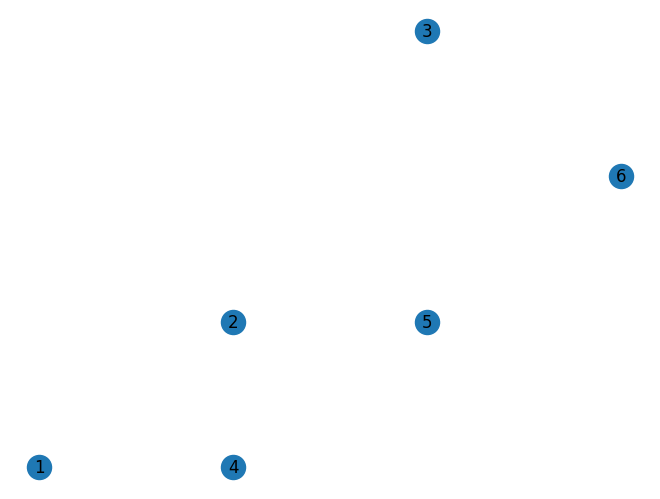

In [44]:
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """
        # Completely unsure. Perhaps related to the size, shape, or elements of the printed graph? (Pehaps it is the amount of nodes total)
        self.dimension = None
        # Presumably a list that holds the key-value pairs of the nodes.
        self.nodeData = []
        # For creating and manipulating the graph.
        self.graph = nx.DiGraph()
        # The location of each node (I think it's a key value pair)
        self.coords = {}
        # The list of places
        self.places = []
        #The route for the greedy TSP solution.
        self.route = []

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
        # Set inputData to a local variable.
        inputData = inputFile
        # Read the file
        if "\n" in inputData:
          lines = inputData.split("\n")
        else:
          with open(inputFile, "r") as id:
            lines = id.readlines()

        # Set the dimensions of the node
        self.dimension = int(lines[0].strip())
        # Append Each Coordinate into the node list (Make sure to exclude line 0 as it is the total number of nodes)
        for nodeId, line in enumerate(lines[1:], start=1):
          # If line is not malformed, then convert the line into an into and append the nodeId, x and y values to to the nodeData list.
          if line.strip():
            x, y = map(int, line.strip().split())
            self.nodeData.append((nodeId, x, y))

    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        # Initialize dictionary
        coordsDict = {}
        # append nodeData as a tuple with each node as the key (nodeId) and coords as the value.
        for val in self.nodeData:
            coordsDict[val[0]] = (val[1], val[2])
        self.coords = coordsDict


    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        # Initialize a and b. Use placeholder coordinates based on self.coords.
        a = (a[0], a[1])
        b = (b[0], b[1])
        # Distance Formula
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        """
        # 3 Conditionals:
        # Check if the node has already been visited.
        # If the node has been visited, then add to the visited list and continue to look for other nodes.
        # If the node has not been visited, then calculate the distance between the current node and all of the other non-visited nodes.
        # Compare each distance and determine which, out of all the distances, is the smallest. (Might be in the greedy algorithm part).
        # Move to that node and repeat the process. (Might be in the greedy algorithm part).

        pass
        #FIXME complete this function

    def beGreedy(self, start):
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm
        """
        pass
        #FIXME complete this function

    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """
        pass
        #FIXME complete this function

    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """ adds nodes to the networkx graph
        """

        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self):
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()




def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    tsp.showGraph()


main()